In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
df_schools = pd.read_csv("Masterlist of Schools.csv", index_col="school.id")

df_location = pd.read_csv("Schools Location Data.csv", 
                          encoding = "latin-1", 
                          index_col="School ID",
                          usecols=["School ID", "Enrolment", "Latitude", "Longitude"])

df_rooms = pd.read_csv('Rooms data.csv', index_col="School ID")

df_teachers = pd.read_csv("Teachers data.csv", index_col="school.id")

df_elementary = pd.read_csv("Enrollment Master Data_2015_E.csv")[:-1].astype(int).set_index("School ID")

df_secondary = (pd.read_csv('Enrollment Master Data_2015_S.csv')[:-1]
                  .replace(",", "", regex=True)
                  .astype(int)
                  .replace("SPED NG Male", "SPED NG Male SS")
                  .replace("SPED NG Female", "SPED NG Female SS")
                  .set_index("School ID"))

df_mooe = (pd.read_csv('MOOE data.csv', index_col="school.id", usecols=["school.id", " school.mooe "])
             .replace(",", "", regex=True).astype(float))

In [3]:
df_mooe

,school.mooe
school.id,
305075,2182000.0
134966,227000.0
134967,144000.0
134968,339000.0
134969,178000.0
...,...
131231,180000.0
131233,248000.0
131236,242000.0


In [4]:
df_all = pd.concat([df_schools, df_location, df_rooms, df_teachers, df_elementary, df_secondary, df_mooe], axis=1)
df_all

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male,SPED NG Female,school.mooe
100001,Apaleng-Libtong ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,Apaleng-Libtong PS,100001.0,-,1/1/1996,Elementary,DepED Managed,Kinder & Elementary,Combined Monograde and Multigrade,P 35 M or more but less than P 45 M,NaN,Partially Urban,90.0,18.253666,120.606180,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,7.0,7.0,2.0,7.0,7.0,9.0,5.0,7.0,5.0,3.0,2.0,14.0,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84000.0
100002,Bacarra CES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100002.0,Santa Rita,1/1/1914,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,456.0,18.250964,120.608958,12.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,41.0,25.0,38.0,33.0,41.0,40.0,28.0,31.0,38.0,30.0,26.0,31.0,22.0,32.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,268000.0
100003,Buyon ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100003.0,NONE,1/1/1947,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,167.0,18.234599,120.616037,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,10.0,13.0,15.0,13.0,13.0,16.0,16.0,14.0,11.0,9.0,12.0,12.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135000.0
100004,Ganagan ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,NaN,100004.0,NONE,1/1/1949,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,122.0,18.250014,120.587169,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,8.0,4.0,9.0,12.0,12.0,10.0,10.0,5.0,14.0,11.0,5.0,7.0,10.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116000.0
100005,Macupit ES,Region I,Ilocos Region,ILOCOS NORTE,ILOCOS NORTE,Ilocos Norte,BACARRA,Bacarra I,1st District,School with no Annexes,NaN,-,100005.0,Macupit,1/1/1913,Elementary,DepED Managed,Elementary,Monograde,P 35 M or more but less than P 45 M,NaN,Partially Urban,77.0,18.293994,120.641019,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,4.0,2.0,5.0,7.0,4.0,6.0,3.0,8.0,11.0,5.0,7.0,4.0,3.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326101,Upper Katungal National High School-TNHS Annex,Region XII,Soccsksargen,SULTAN KUDARAT,SULTAN KUDARAT,Tacurong City,CITY OF TACURONG,Tacurong South,1st District,Annex or Extension school(s),UKNHS-TNHS Annex,Tacurong NHS - Upper Katungal Annex,304624.0,Upper Katungal,1/1/2011,Secondary,DepED Managed,Secondary,Monograde,P 160 M or more but less than P 240 M,Compo

In [5]:
df_all.shape

(46751, 64)

In [6]:
df_all.isna().sum()

school.name                     148
school.region                   148
school.region.name              148
school.province                 148
school.cityhall                 149
school.division                 148
school.citymuni                 148
school.district                 148
school.legdistrict              148
school.type                     148
school.abbrev                 28584
school.previousname            4530
school.mother.id                155
school.address                 2130
school.established              157
school.classification           148
school.classification2          148
school.curricularclass          148
school.organization             148
school.cityincome              1124
school.cityclass              38538
school.urban                    151
Enrolment                       127
Latitude                        130
Longitude                       130
rooms.standard.academic         339
rooms.standard.unused           339
rooms.nonstandard.academic  

In [7]:
df_all[df_all.index.duplicated(keep=False)]

,school.name,school.region,school.region.name,school.province,school.cityhall,school.division,school.citymuni,school.district,school.legdistrict,school.type,school.abbrev,school.previousname,school.mother.id,school.address,school.established,school.classification,school.classification2,school.curricularclass,school.organization,school.cityincome,school.cityclass,school.urban,Enrolment,Latitude,Longitude,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Kinder Male,Kinder Female,Grade 1 Male,Grade 1 Female,Grade 2 Male,Grade 2 Female,Grade 3 Male,Grade 3 Female,Grade 4 Male,Grade 4 Female,Grade 5 Male,Grade 5 Female,Grade 6 Male,Grade 6 Female,SPED NG Male,SPED NG Female,Grade 7 Male,Grade 7 Female,Grade 8 Male,Grade 8 Female,Grade 9 Male,Grade 9 Female,Grade 10 Male,Grade 10 Female,Grade 11 Male,Grade 11 Female,Grade 12 Male,Grade 12 Female,SPED NG Male,SPED NG Female,school.mooe


In [8]:
df_all.columns

Index(['school.name', 'school.region', 'school.region.name', 'school.province',
       'school.cityhall', 'school.division', 'school.citymuni',
       'school.district', 'school.legdistrict', 'school.type', 'school.abbrev',
       'school.previousname', 'school.mother.id', 'school.address',
       'school.established', 'school.classification', 'school.classification2',
       'school.curricularclass', 'school.organization', 'school.cityincome',
       'school.cityclass', 'school.urban', 'Enrolment', 'Latitude',
       'Longitude', 'rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped', 'Kinder Male', 'Kinder Female', 'Grade 1 Male',
       'Grade 1 Female', 'Grade 2 Male', 'Grade 2 Female', 'Grade 3 Male',
       'Grade 3 Female', 'Grade 4 Male', 'Grade 4 Female', 'Grade 5 Male',
       'Grade 5 Female', 'Grade 6 Male', 'Grade 6 Femal

In [9]:
df_numeric = df_all[['rooms.standard.academic', 'rooms.standard.unused',
       'rooms.nonstandard.academic', 'rooms.nonstandard.unused',
       'teachers.instructor', 'teachers.mobile', 'teachers.regular',
       'teachers.sped','Enrolment', ' school.mooe ', 'school.classification']]
df_numeric

,rooms.standard.academic,rooms.standard.unused,rooms.nonstandard.academic,rooms.nonstandard.unused,teachers.instructor,teachers.mobile,teachers.regular,teachers.sped,Enrolment,school.mooe,school.classification
100001,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,90.0,84000.0,Elementary
100002,12.0,0.0,0.0,0.0,0.0,6.0,11.0,0.0,456.0,268000.0,Elementary
100003,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,167.0,135000.0,Elementary
100004,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,122.0,116000.0,Elementary
100005,6.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,77.0,115000.0,Elementary
...,...,...,...,...,...,...,...,...,...,...,...
326101,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,262.0,174000.0,Secondary
326102,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,191.0,144000.0,Secondary
326501,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,185.0,NaN,Secondary
356059,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,136.0,177000.0,Secondary


In [10]:
df_numeric["rooms_total"] = (df_numeric['rooms.standard.academic'] + 
                             df_numeric['rooms.standard.unused'] + 
                             df_numeric['rooms.nonstandard.academic'] + 
                             df_numeric['rooms.nonstandard.unused'])

df_numeric["teachers_total"] = (df_numeric['teachers.instructor'] + 
                             df_numeric['teachers.mobile'] + 
                             df_numeric['teachers.regular'] + 
                             df_numeric['teachers.sped'])
df_final = df_numeric.iloc[:, 8:]
df_final

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Enrolment,school.mooe,school.classification,rooms_total,teachers_total
100001,90.0,84000.0,Elementary,2.0,2.0
100002,456.0,268000.0,Elementary,12.0,17.0
100003,167.0,135000.0,Elementary,6.0,7.0
100004,122.0,116000.0,Elementary,6.0,7.0
100005,77.0,115000.0,Elementary,6.0,7.0
...,...,...,...,...,...
326101,262.0,174000.0,Secondary,2.0,NaN
326102,191.0,144000.0,Secondary,2.0,NaN
326501,185.0,NaN,Secondary,NaN,0.0
356059,136.0,177000.0,Secondary,3.0,NaN


In [11]:
df_final.isna().sum()

Enrolment                 127
 school.mooe             2723
school.classification     148
rooms_total               343
teachers_total           1711
dtype: int64

In [12]:
df_final_clean = df_final.dropna()
df_final_clean.shape

(42342, 5)

In [13]:
index_name = (df_final_clean[(df_final_clean["Enrolment"]==0.0) | 
                             (df_final_clean["teachers_total"]==0.0) |
                             (df_final_clean["rooms_total"]==0.0)].index)
index_name

Int64Index([100464, 100761, 102907, 104110, 104622, 104895, 107211, 107212,
            107305, 107318,
            ...
            325301, 325302, 325303, 325304, 325305, 325307, 325308, 325502,
            325901, 325902],
           dtype='int64', length=627)

In [14]:
df_final_clean = df_final_clean.drop(index_name)
df_final_clean.shape[0]

41715

In [15]:
dropped_rows = df_final.shape[0] - df_final_clean.shape[0]
dropped_rows

5036

In [16]:
dropped_rows/df_final.shape[0]*100

10.771962097067442

In [17]:
df_ratio_ss = df_final_clean[df_final_clean["school.classification"]=='Secondary'].drop(columns=["school.classification"])

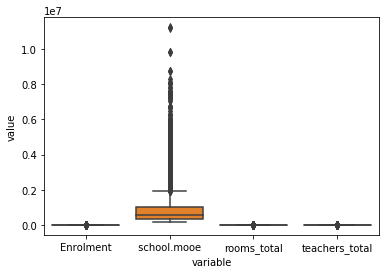

In [18]:
melted = df_ratio_ss.melt()

sns.boxplot(melted.variable, melted.value)

In [19]:
# Insert code here
# Removing (statistical) outliers for Amount
Q1 = df_ratio_ss[' school.mooe '].quantile(0.05)
Q3 = df_ratio_ss[' school.mooe '].quantile(0.95)
IQR = Q3 - Q1
df_ratio_ss = (df_ratio_ss[(df_ratio_ss[' school.mooe '] >= Q1 - 1.5*IQR) & 
                           (df_ratio_ss[' school.mooe '] <= Q3 + 1.5*IQR)])


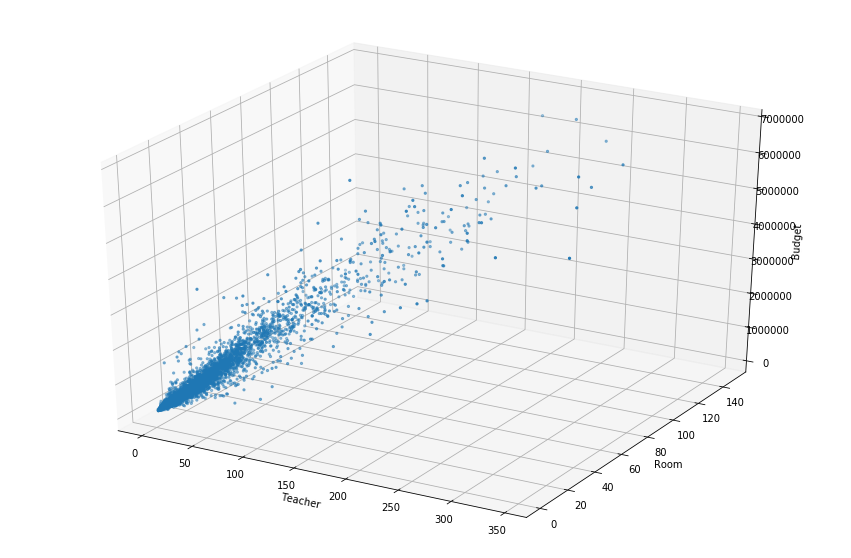

In [20]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

teacher = df_ratio_ss.teachers_total
room = df_ratio_ss.rooms_total
budget = df_ratio_ss[' school.mooe ']
ax.scatter(teacher, room, budget, s=5)

ax.set_xlabel('Teacher')
ax.set_ylabel('Room')
ax.set_zlabel('Budget')

plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_ss = scaler.fit_transform(df_ratio_ss)

In [22]:
print(df_scaled_ss.min())
print(df_scaled_ss.max())

-0.9573687257244511
9.856742101069873


In [23]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(df_scaled_ss)
cluster_labels = model.predict(df_scaled_ss)   


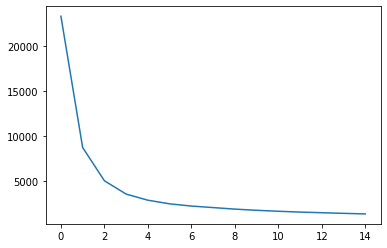

In [24]:
from sklearn.cluster import KMeans

ssd = []
range_n_clusters = list(np.arange(1,16))

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled_ss)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [50]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled_ss)
cluster_labels = kmeans.predict(df_scaled_ss)   

df_ratio_ss['Cluster_Labels'] = cluster_labels
df_ratio_ss['Cluster_Labels'].value_counts()

1    4514
0    1056
2     269
Name: Cluster_Labels, dtype: int64

In [26]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
range_n_clusters = list(np.arange(2,9))

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(df_scaled_ss)
    
    cluster_labels = kmeans.predict(df_scaled_ss)
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled_ss, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7492345436288593
For n_clusters=3, the silhouette score is 0.6401747740844933
For n_clusters=4, the silhouette score is 0.570152405532347
For n_clusters=5, the silhouette score is 0.5271375642085796
For n_clusters=6, the silhouette score is 0.449785870868889
For n_clusters=7, the silhouette score is 0.4485473947068007
For n_clusters=8, the silhouette score is 0.44664196588454047


In [27]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

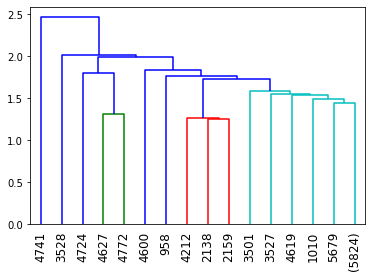

In [28]:
mergings = linkage(df_scaled_ss, method="single", metric='euclidean')

dendrogram(mergings, p=10, truncate_mode="level", leaf_rotation=90)
plt.show()

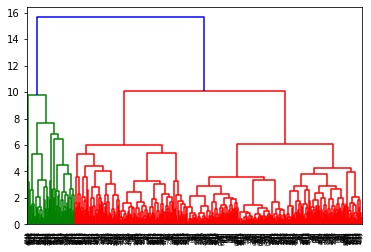

In [29]:
mergings = linkage(df_scaled_ss, method="complete", metric='euclidean')
dendrogram(mergings, p=10, truncate_mode="level")
plt.show()

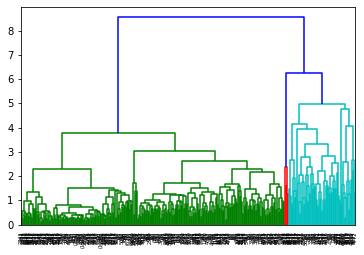

In [30]:
mergings = linkage(df_scaled_ss, method="average", metric='euclidean')
dendrogram(mergings, p=10, truncate_mode="level")
plt.show()

In [31]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )

In [32]:
df_ratio_ss['Cluster_Labels'] = cluster_labels

In [33]:
df_ratio_ss['Cluster_Labels'].value_counts()

0    5682
1     153
2       4
Name: Cluster_Labels, dtype: int64

In [34]:
df_ratio_ss[df_ratio_ss['Cluster_Labels']==0]

,Enrolment,school.mooe,rooms_total,teachers_total,Cluster_Labels
300001,118.0,232000.0,4.0,7.0,0
300002,1939.0,1839000.0,43.0,66.0,0
300003,613.0,701000.0,18.0,29.0,0
300004,364.0,440000.0,11.0,12.0,0
300005,504.0,793000.0,14.0,50.0,0
...,...,...,...,...,...
324101,192.0,169000.0,2.0,1.0,0
325101,407.0,409000.0,3.0,10.0,0
325102,302.0,331000.0,5.0,8.0,0
325104,503.0,460000.0,9.0,11.0,0


In [35]:
df_ratio_ss[df_ratio_ss['Cluster_Labels']==1]

,Enrolment,school.mooe,rooms_total,teachers_total,Cluster_Labels
300052,4712.0,4399000.0,93.0,178.0,1
300118,4317.0,4369000.0,83.0,176.0,1
300168,5494.0,4818000.0,67.0,170.0,1
300183,3801.0,3817000.0,104.0,146.0,1
300233,4722.0,4680000.0,94.0,188.0,1
...,...,...,...,...,...
305468,7006.0,6617000.0,79.0,299.0,1
307901,5543.0,4468000.0,74.0,107.0,1
307907,4123.0,3825000.0,46.0,155.0,1
309301,5573.0,5457000.0,125.0,198.0,1


In [36]:
df_ratio_ss[df_ratio_ss['Cluster_Labels']==2]

,Enrolment,school.mooe,rooms_total,teachers_total,Cluster_Labels
302264,7086.0,6712000.0,134.0,227.0,2
302285,7188.0,6067000.0,120.0,218.0,2
303923,5955.0,6296000.0,148.0,177.0,2
304671,6512.0,6043000.0,142.0,246.0,2


- Does it makes sense to use the raw numbers as features? What can be an alternative to the raw numbers?
- Are there outliers in the other features as well?
- Try exploring different number of clusters. How many clusters can you characterize?
- Try playing with different hierarchical methods. Which gives the best result?

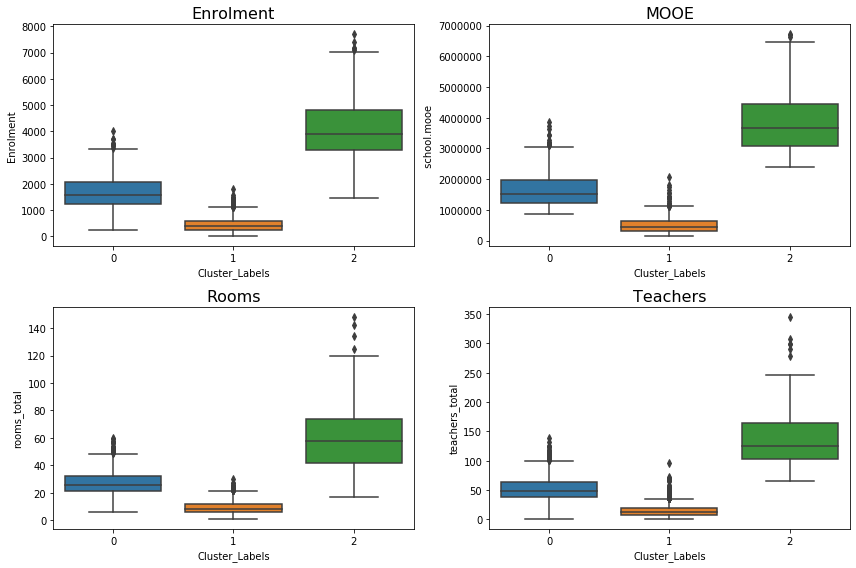

In [54]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

sns.boxplot(x="Cluster_Labels", y="Enrolment", data=df_ratio_ss, ax=axes[0,0])
axes[0,0].set_title("Enrolment", fontsize=16)

sns.boxplot(x=df_ratio_ss.Cluster_Labels, y=df_ratio_ss[" school.mooe "], ax=axes[0,1])
axes[0,1].set_title("MOOE", fontsize=16)

sns.boxplot(x=df_ratio_ss.Cluster_Labels, y=df_ratio_ss.rooms_total, ax=axes[1,0])
axes[1,0].set_title("Rooms", fontsize=16)

sns.boxplot(x=df_ratio_ss.Cluster_Labels, y=df_ratio_ss.teachers_total, ax=axes[1,1])
axes[1,1].set_title("Teachers", fontsize=16)

plt.tight_layout()
plt.show();

#### T-SNE
- t-SNE = “t-distributed stochastic neighbor embedding”
- Maps samples to 2D space (or 3D)
- Map approximately preserves nearness of samples
- Great for inspecting datasets

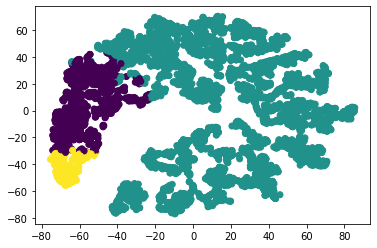

In [135]:
# t-SNE visualization of grain dataset

# Import TSNE
from sklearn.manifold import TSNE

variety_numbers = list(df_ratio_ss.iloc[:,-1])

# Create a TSNE instance: model
model = TSNE(learning_rate=300, perplexity=30)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(df_scaled_ss)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()

#### Radar Chart

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df_ratio_ss)

df_minmax = pd.DataFrame(df_minmax, index=df_ratio_ss.index, columns=df_ratio_ss.columns)

df_minmax['Cluster_Labels'] = cluster_labels

df_clusters = df_minmax.set_index("Cluster_Labels")
df_clusters = df_clusters.groupby("Cluster_Labels").mean().reset_index()
df_clusters

,Cluster_Labels,Enrolment,school.mooe,rooms_total,teachers_total
0,0,0.218648,0.228548,0.179306,0.148649
1,1,0.057434,0.054819,0.054732,0.038709
2,2,0.540326,0.569480,0.406090,0.398515


In [130]:
from math import pi
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df_clusters)[1:]
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 3.5)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
#     plt.yticks([-2, -1, 0, 1, 2], [-2,-1, 0, 1, 2], color="grey", size=7) #for sscaled
#     plt.ylim(-2.5,2.5)
    plt.yticks([-0.25, 0, 0.25, 0.5, 0.75, 1], [-0.25, 0, 0.25, 0.5,0.75, 1], color="grey", size=7) #formmscaled
    plt.ylim(-0.25,1)

    # Ind1
    values=df_clusters.loc[row].drop('Cluster_Labels').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    plt.title(title, size=14, color=color, y=1.1)
 
    

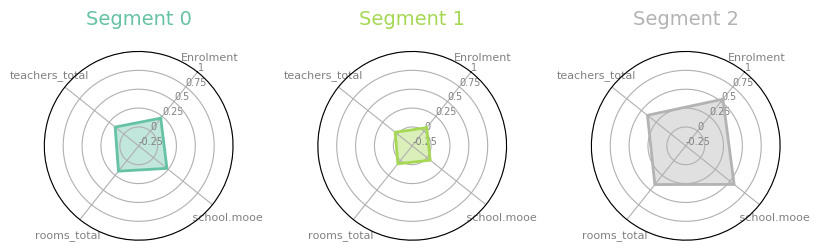

In [131]:
my_dpi=100
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
plt.subplots_adjust(hspace=0.5)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df_clusters.index))

for row in range(0, len(df_clusters.index)):
    make_spider(row=row, 
                title='Segment '+(df_clusters['Cluster_Labels'][row]).astype(str), 
                color=my_palette(row))